# Primer Examen 15%

A) Cargando el archivo JSON: 
* https://github.com/restrepo/anomaly/raw/main/solutions.json.gz

en Pandas

1) Adicione una columna nueva `'smax'` con el valor máximo en valor absoluto de la lista de enteros de la correspondiente entrada en la columna '`solution`'
2) Adicione dos columnas nuevas: `'sum_s'` (`sum_s³`) con el resultado de la suma (al cubo) de todos los números de la lista de enteros de la correspondiente entrada en la columna '`solution`'
3) Usando como semilla el número de su cédula, genere un número entero de forma aleatoria entre 0 y 390073. Seleccione el la fila correspondiente a ese número entero y construya un polinomio con esos coeficientes. Encuentre las raices reales de ese polinomio y realice el correspondiente gráfico incluyendo: el polinomio generado, sus raices (como puntos en gráfico) y la derivada del polinomio. Optimize el rango de valores en el eje $x$ y en el eje $y$ del gráfico, de manera que el polinomio y sus raices se visualicen de la mejor forma posible. (Sugerencia → use: `plt.ylim(ymin,ymax)` ). Se tendrá en cuenta la estética del gráfico presentado incluyendo la rotulación adecuada del mismo


B)

I) Usando como semilla el número de su cédula, genere de forma aletoria un número entero entre 1 y 5

II) De acuerdo al entero obtenido, escoja una de las siguientes cinco funciones 
1. $$x\operatorname{e}^x=p\,, $$
2. $$\frac{\sin x}{x}=+p\,,$$
3. $$\frac{\sin x}{x}=-p\,,$$
4. $$\frac{\cos x}{x}=+p\,,$$
5. $$\frac{\cos x}{x}=-p\,,$$
III) Genere un número aleatorio entre 0 y 1 y asignelo al valor de $p$
IV) Encuentre la solución a la ecuación trascendental para el intervalo $x$ entre -10 y 10 y gráfique la correspondiente función trascendental y las correspondientes soluciones. . Se tendrá en cuenta la estética del gráfico presentado incluyendo la rotulación adecuada del mismo.

A modo de nota curiosa: estas ecuaciones trascendentales están asociadas a soluciones de la ecuación de Schödinger en mecánica cuántica: https://doi.org/10.1080/14786435.2015.1081425

In [44]:
#Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as sp



# Punto 1

In [2]:
#Cargar Archivo

df = pd.read_json("solutions.json")
df

,l,k,solution,gcd,n
0,"[-1, 0, -1, 0, -1]","[-1, 0, -1, 1, -1]","[1, 4, 4, 4, -5, -5, -5, -5, -5, 6, 6]",1,11
1,"[-1, 1]","[-1, 0, -1]","[1, 2, 2, -3, -3, -3, 4]",1,7
2,"[1, -1, 0, 1, -1]","[-2, 0, -1, -2, 0]","[1, 1, -2, -2, -3, -3, 5, 5, 5, 5, -6, -6]",2,12
3,"[-1, 1, -1, 1, -1]","[-2, -1, 0, -1, 0]","[1, 1, 1, 1, 2, 2, 2, -3, -4, -4, -6, 7]",1,12
4,"[1, 0, 1, 0, -1]","[-2, -1, -2, -1, 0]","[1, 1, 1, -2, -2, -5, -5, 6, 6, 7, -8]",1,11
...,...,...,...,...,...
390069,"[-3, -15, -6]","[-3, 8, 9]","[8, -9, -9, 11, 25, -29, -29, 32]",36,8
390070,"[-10, -5, -15]","[-10, -12, 12]","[5, 5, 5, -17, -27, -27, 28, 28]",100,8
390071,"[15, -1, 15]","[-14, -13, -14]","[14, -15, -16, 17, -30, 31, 31, -32]",1,8
390072,"[-15, -9, -1]","[-13, -14, -12]","[11, -13, -15, 19, 23, -26, -30, 31]",18,8


In [3]:
#Adicione una columna nueva 'smax' con el valor máximo en valor absoluto de la lista
#de enteros de la correspondiente entrada en la columna 'solution´

df["smax"] = df.solution.apply(lambda i : max(map(abs, i)))

In [4]:
df

,l,k,solution,gcd,n,smax
0,"[-1, 0, -1, 0, -1]","[-1, 0, -1, 1, -1]","[1, 4, 4, 4, -5, -5, -5, -5, -5, 6, 6]",1,11,6
1,"[-1, 1]","[-1, 0, -1]","[1, 2, 2, -3, -3, -3, 4]",1,7,4
2,"[1, -1, 0, 1, -1]","[-2, 0, -1, -2, 0]","[1, 1, -2, -2, -3, -3, 5, 5, 5, 5, -6, -6]",2,12,6
3,"[-1, 1, -1, 1, -1]","[-2, -1, 0, -1, 0]","[1, 1, 1, 1, 2, 2, 2, -3, -4, -4, -6, 7]",1,12,7
4,"[1, 0, 1, 0, -1]","[-2, -1, -2, -1, 0]","[1, 1, 1, -2, -2, -5, -5, 6, 6, 7, -8]",1,11,8
...,...,...,...,...,...,...
390069,"[-3, -15, -6]","[-3, 8, 9]","[8, -9, -9, 11, 25, -29, -29, 32]",36,8,32
390070,"[-10, -5, -15]","[-10, -12, 12]","[5, 5, 5, -17, -27, -27, 28, 28]",100,8,28
390071,"[15, -1, 15]","[-14, -13, -14]","[14, -15, -16, 17, -30, 31, 31, -32]",1,8,32
390072,"[-15, -9, -1]","[-13, -14, -12]","[11, -13, -15, 19, 23, -26, -30, 31]",18,8,31


In [12]:
#Adicione dos columnas nuevas: 'sum_s' (sum_s³) con el resultado de la suma (al cubo) de todos
#los números de la lista de enteros de la correspondiente entrada en la columna 'solution´

df["sum_s"] = df.solution.apply(lambda i : sum(i))

In [14]:
df["sum_s³"] = df.sum_s.apply(lambda i : i**3)

In [15]:
df

,l,k,solution,gcd,n,smax,sum_s,sum_s³
0,"[-1, 0, -1, 0, -1]","[-1, 0, -1, 1, -1]","[1, 4, 4, 4, -5, -5, -5, -5, -5, 6, 6]",1,11,6,0,0
1,"[-1, 1]","[-1, 0, -1]","[1, 2, 2, -3, -3, -3, 4]",1,7,4,0,0
2,"[1, -1, 0, 1, -1]","[-2, 0, -1, -2, 0]","[1, 1, -2, -2, -3, -3, 5, 5, 5, 5, -6, -6]",2,12,6,0,0
3,"[-1, 1, -1, 1, -1]","[-2, -1, 0, -1, 0]","[1, 1, 1, 1, 2, 2, 2, -3, -4, -4, -6, 7]",1,12,7,0,0
4,"[1, 0, 1, 0, -1]","[-2, -1, -2, -1, 0]","[1, 1, 1, -2, -2, -5, -5, 6, 6, 7, -8]",1,11,8,0,0
...,...,...,...,...,...,...,...,...
390069,"[-3, -15, -6]","[-3, 8, 9]","[8, -9, -9, 11, 25, -29, -29, 32]",36,8,32,0,0
390070,"[-10, -5, -15]","[-10, -12, 12]","[5, 5, 5, -17, -27, -27, 28, 28]",100,8,28,0,0
390071,"[15, -1, 15]","[-14, -13, -14]","[14, -15, -16, 17, -30, 31, 31, -32]",1,8,32,0,0
390072,"[-15, -9, -1]","[-13, -14, -12]","[11, -13, -15, 19, 23, -26, -30, 31]",18,8,31,0,0


In [19]:
#3) Usando como semilla el número de su cédula, genere un número entero de forma aleatoria entre 0 y 390073.
#Seleccione el la fila correspondiente a ese número entero y construya un polinomio con esos coeficientes.

np.random.seed(1067912559)
n = np.random.randint(0, 390073)
print(n)

195236


In [77]:
coef = df.solution[195236]
#print(coef)
poly = np.poly1d(coef)#polinomio construido
print("El polinomio construido es:\n {}".format(poly))

El polinomio construido es:
    9     8     7      6      5      4      3      2
4 x + 5 x + 6 x + 14 x - 17 x - 18 x - 18 x - 20 x + 21 x + 23


Las racices reales del polinomio son: [-1.82662044  1.08117447  1.        ]
La derivada del polinomio es: 
     8      7      6      5      4      3      2
36 x + 40 x + 42 x + 84 x - 85 x - 72 x - 54 x - 40 x + 21


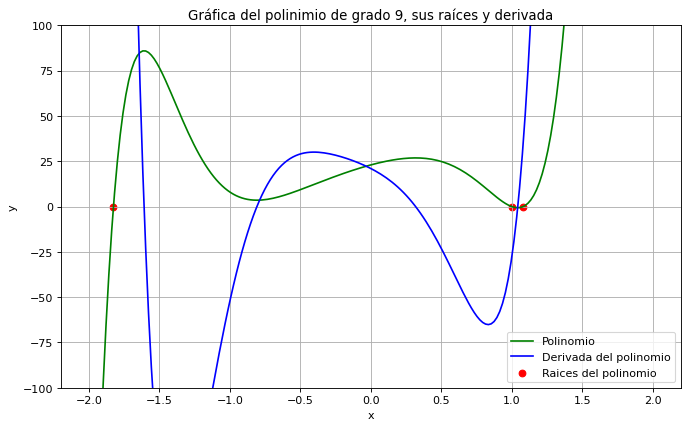

In [172]:
#Encuentre las raices reales de ese polinomio y realice el correspondiente gráfico incluyendo: 
#el polinomio generado, sus raices (como puntos en gráfico) y la derivada del polinomio.

#Roots
roots = np.roots(poly)
rootsreal = raices[raices.imag == 0].real


print("Las racices reales del polinomio son: {}".format(rootsreal))
print("La derivada del polinomio es: \n {}".format(derivada))

x = np.linspace(-2, 2 ,200)
#Plot
plt.figure(figsize=(10, 6), dpi=80)
plt.scatter( rootsreal, poly(rootsreal) , color ="red", label = "Raices del polinomio")
plt.plot(x, poly(x), color = "green", label = "Polinomio")
plt.plot(x, derivada(x), color = "blue", label = "Derivada del polinomio")
plt.ylim(-100, 100)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Gráfica del polinimio de grado 9, sus raíces y derivada")
plt.legend()
plt.grid();

# Punto 2

In [101]:
#Usando como semilla el número de su cédula, genere de forma aletoria un número entero entre 1 y 5
np.random.seed(1067912559)
a = np.random.randint(1, 5)
print(a)

3


In [143]:
#Genere un número aleatorio entre 0 y 1 y asignelo al valor de  𝑝 
p = np.random.random(1)
print(p)

[0.03871798]


Las soluciones en el intervalo -10 a 10 son: [-6.04686937 -3.26848189  3.26848189  6.04686937]


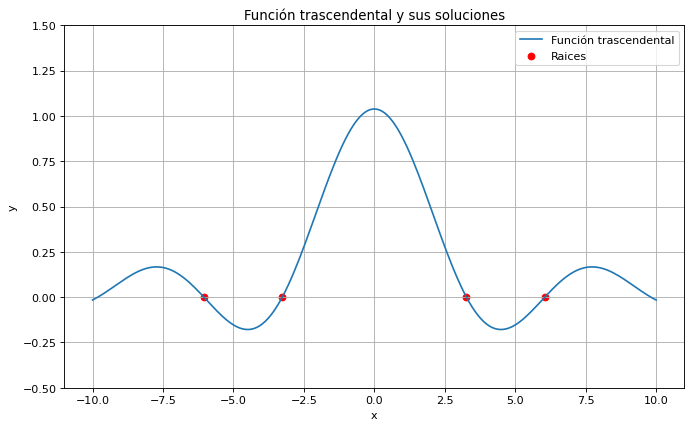

In [168]:

f =  lambda x : np.sin(x)/x + p
fprime = lambda x : (x* np.cos(x) - np.sin(x))/ x**2

x2 = np.linspace(-10, 10, 200)

#Para encontras la solución 
r = sp.newton(f, [-5,-2,2,5], fprime)
print("Las soluciones en el intervalo -10 a 10 son: {}".format(r))

#Plot
plt.figure(figsize=(10, 6), dpi=80)
plt.plot(x2, f(x2), label = "Función trascendental")
plt.scatter(r,f(r) ,color = "red", label = "Raices")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Función trascendental y sus soluciones")
plt.ylim(-0.5, 1.5)
plt.grid()
